In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pygsp import filters, graphs

In [2]:
def plot_eigenmodes(graph, n=10, N1=1):
    ncols = 5
    nrows = n//ncols
    fig, axs = plt.subplots(ncols=ncols, nrows = nrows, figsize=(18,nrows*4),subplot_kw={'projection': '3d'})
    for i in range(n):
        graph.plot(graph.U[:,N1+i], title = 'Eigenmode {}'.format(N1+i), edges=False, colorbar=False, ax = axs[np.unravel_index(i,(nrows,ncols))])


In [3]:
def create2d_disk_graph(n = 100, r = 1, d = 0.1):
    
    # Generate fixed points on a disk centered at the origin
    # n : nb of nodes
    # r : disk radius
    # d : den
    alpha = 4.0*np.pi*r*r/n
    d = np.sqrt(alpha)
    m_nu = int(np.round(np.pi/d))
    d_nu = np.pi/m_nu
    d_phi = alpha/d_nu
    count = 0
    pts = []
    for m_ in range (0,m_nu):
        nu = np.pi*(m_+0.5)/m_nu
        m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
        for n_ in range (0,m_phi):
            phi = 2*np.pi*n_/m_phi
            xp = np.sin(nu)*np.cos(phi)
            yp = np.sin(nu)*np.sin(phi)
            count = count +1
            pts.append([xp,yp])
            
    pts = np.asarray(pts)
    
    # Create a disk graph with local connectivity based on the previously defined points
    disk_geodesic = graphs.NNGraph(Xin=pts, k = 6,lap_type='normalized',rescale=False)

    
    return disk_geodesic

In [4]:
def create3d_sphere_connectome_graph(n = 100, r = 1, d = 0.1):
    
    # Generate fixed points on a sphere centered at the origin
    # n : nb o
    # r : sphere radius
    # d : den
    alpha = 4.0*np.pi*r*r/n
    d = np.sqrt(alpha)
    m_nu = int(np.round(np.pi/d))
    d_nu = np.pi/m_nu
    d_phi = alpha/d_nu
    count = 0
    pts = []
    for m_ in range (0,m_nu):
        nu = np.pi*(m_+0.5)/m_nu
        m_phi = int(np.round(2*np.pi*np.sin(nu)/d_phi))
        for n_ in range (0,m_phi):
            phi = 2*np.pi*n_/m_phi
            xp = np.sin(nu)*np.cos(phi)
            yp = np.sin(nu)*np.sin(phi)
            zp = np.cos(nu)
            count = count +1
            pts.append([xp,yp,zp])
            
    pts = np.asarray(pts)
    
    # Create a sphere graph with local connectivity based on the previously defined points
    sphere_geodesic = graphs.NNGraph(Xin=pts, k = 6,lap_type='normalized',rescale=False)
    n = len(pts)
    
    # Generate connectome-like long-range connectivity among the sphere nodes.
    classes_x = (sphere_geodesic.coords[:,0]>np.percentile(sphere_geodesic.coords[:,0],50)).astype(int)
    classes_y = (sphere_geodesic.coords[:,1]>np.percentile(sphere_geodesic.coords[:,1],50)).astype(int)
    classes_z = (sphere_geodesic.coords[:,2]>np.percentile(sphere_geodesic.coords[:,2],50)).astype(int)

    block_x = graphs.StochasticBlockModel(N=n,k=2,z=classes_x,p=0.4,q=0.075).A.todense()
    block_y = graphs.StochasticBlockModel(N=n,k=2,z=classes_y,p=0.4,q=0.075).A.todense()
    block_z = graphs.StochasticBlockModel(N=n,k=2,z=classes_z,p=0.4,q=0.075).A.todense()


    sphere_connectome_adj = (block_x>0) & (block_y>0)& (block_z>0)
    sphere_connectome = graphs.Graph(sphere_connectome_adj,lap_type='normalized',coords=sphere_geodesic.coords)
    
    sphere_connectome_geodesic_adj = (sphere_geodesic.A + sphere_connectome_adj.A)>0
    sphere_connectome_geodesic = graphs.Graph(sphere_connectome_geodesic_adj,lap_type='normalized',coords=sphere_geodesic.coords)
    
    return sphere_connectome, sphere_geodesic, sphere_connectome_geodesic

In [5]:
G = graphs.Grid2d(N1=50)

2022-12-08 08:38:58,802:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


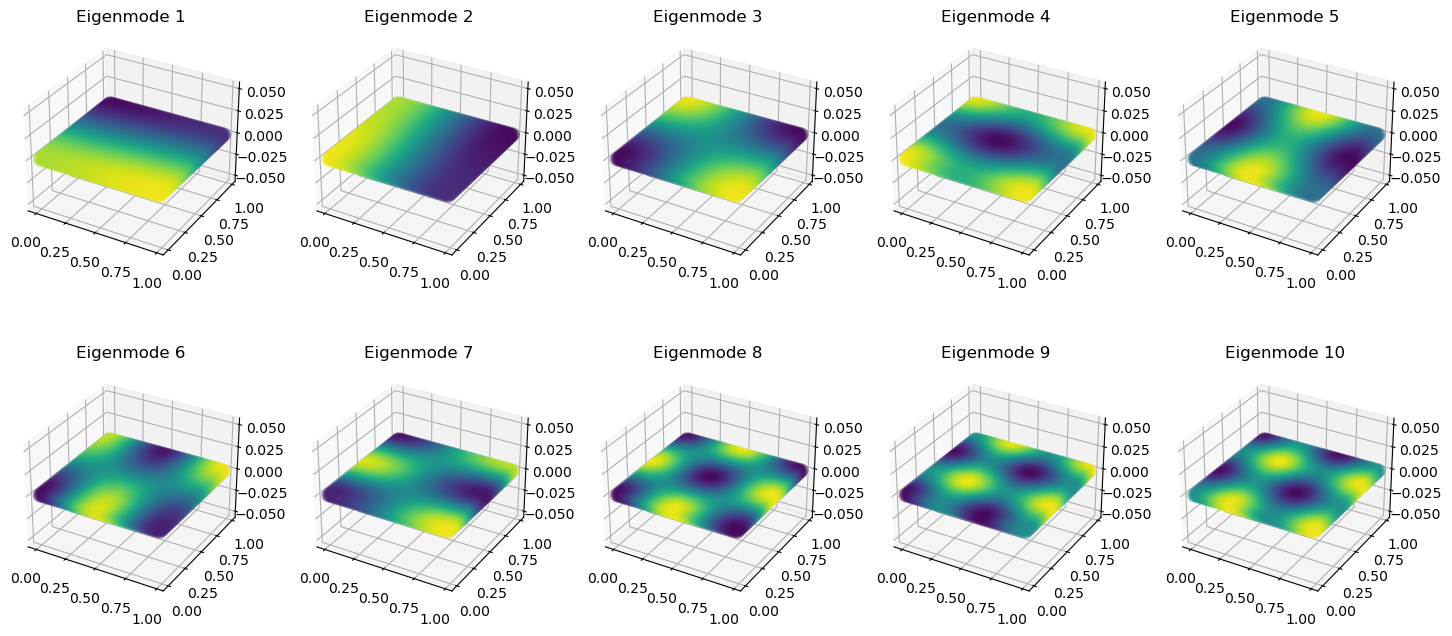

In [6]:
plot_eigenmodes(G)

In [7]:
sphere_connectome, sphere_geodesic, sphere_connectome_geodesic = create3d_sphere_connectome_graph(n=1000)

2022-12-08 08:39:08,067:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


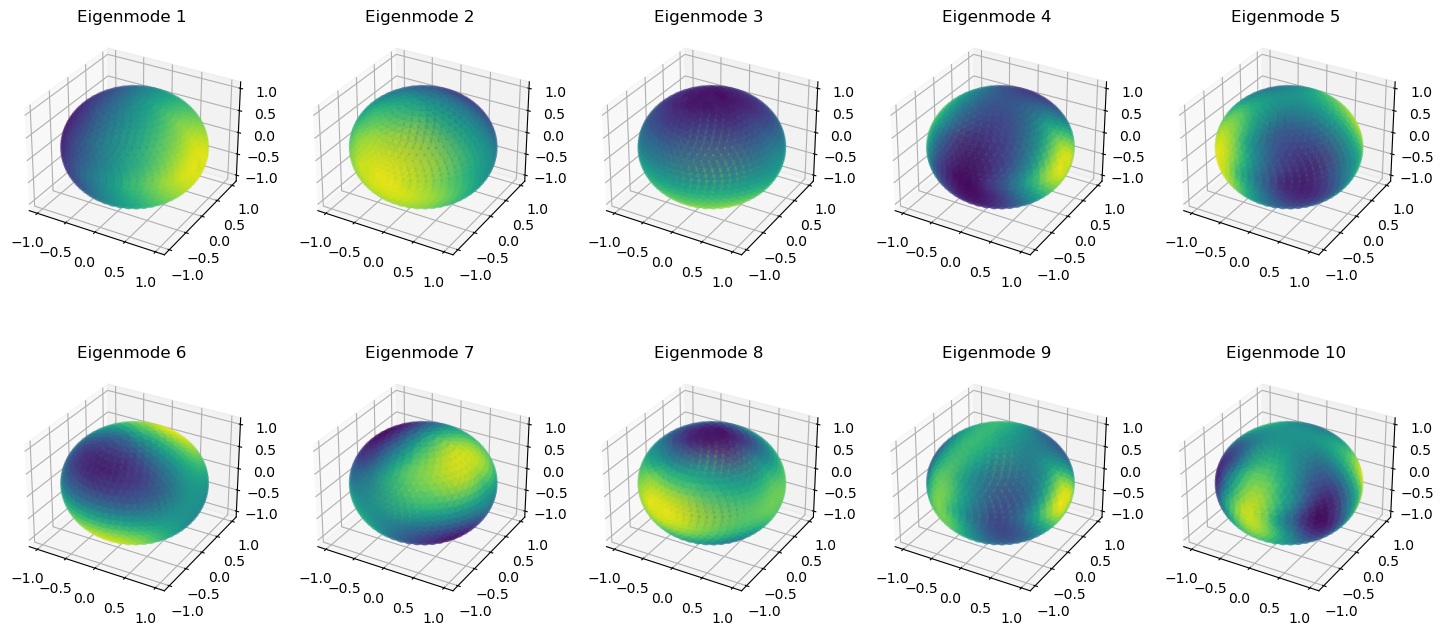

In [8]:
plot_eigenmodes(sphere_geodesic)

## What happens when the graph is not as "regular"?

2022-12-08 08:39:10,490:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


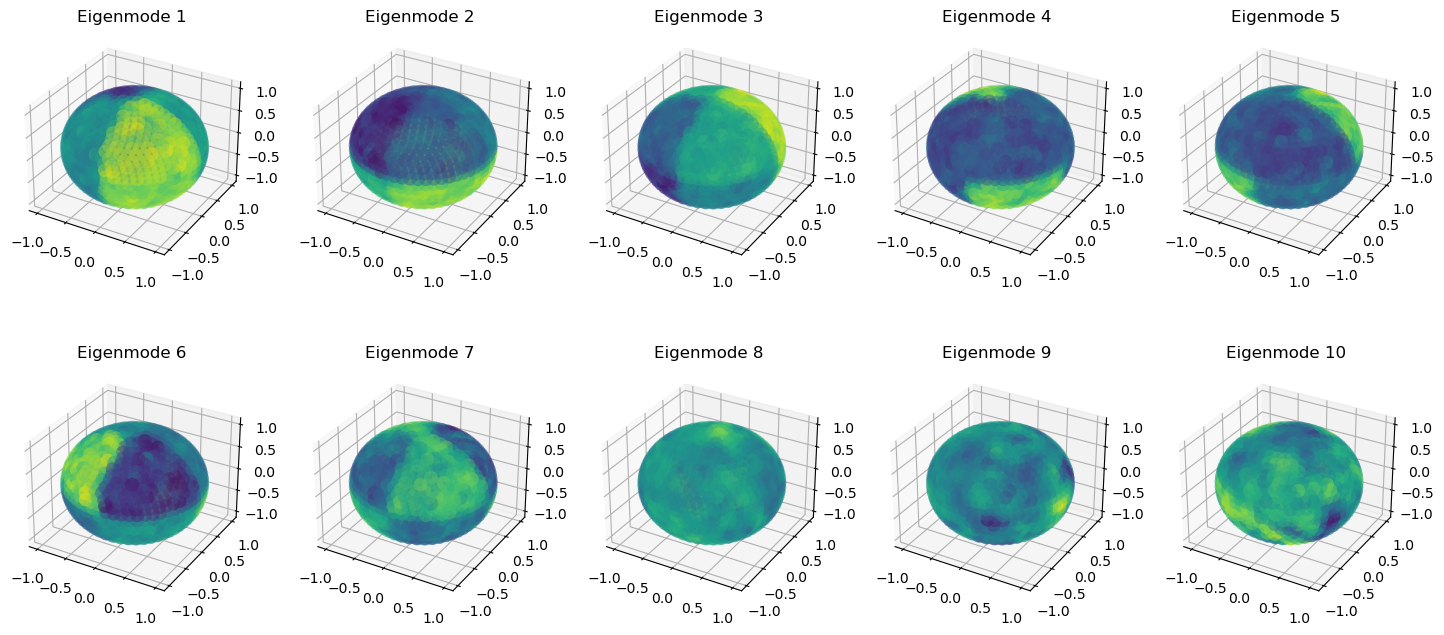

In [9]:
plot_eigenmodes(sphere_connectome_geodesic)

## Showcase basic operations while continuing to compare increasingly complex graphs
Fourier spectrum
filtering to divide in sub-bands
interpretation of the outcomes

In [10]:
G = graphs.DavidSensorNet()

/Users/hugofluhr/miniconda3/envs/gsp/lib/python3.11/site-packages/pygsp/plotting.py:546: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  sc = ax.scatter(*G.coords.T,


(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: title={'center': 'DavidSensorNet(n_vertices=64, n_edges=236, seed=None)'}>)

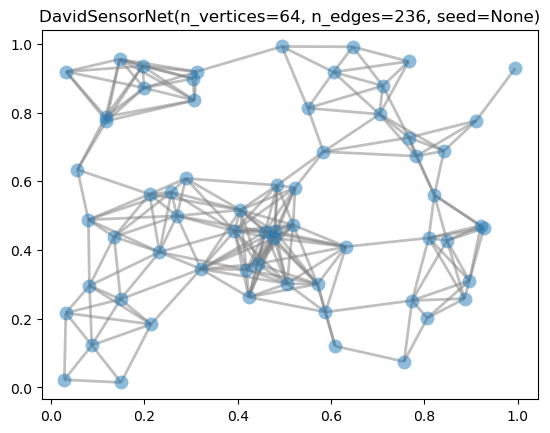

In [11]:
G.plot()